## Step 01 - Get The Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/IOT_PROJECT/GlobalLandTemperaturesByCity.csv')

##Step 02 - Exploring The Data Set

In [ ]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country
0,1796-01-01,24.317,2.190,Colombo,Sri Lanka
1,1796-02-01,23.923,1.484,Colombo,Sri Lanka
2,1796-03-01,24.407,2.309,Colombo,Sri Lanka
3,1796-04-01,27.171,1.650,Colombo,Sri Lanka
4,1796-05-01,29.050,1.290,Colombo,Sri Lanka


In [ ]:
df.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country
2608,5/1/2013,29.718,0.574,Colombo,Sri Lanka
2609,6/1/2013,27.686,0.260,Colombo,Sri Lanka
2610,7/1/2013,26.519,0.177,Colombo,Sri Lanka
2611,8/1/2013,26.953,0.390,Colombo,Sri Lanka
2612,9/1/2013,NaN,NaN,Colombo,Sri Lanka


In [ ]:
#checking whether how many different cities are there in the data set
df_groupedBy_city = df.groupby('City' , as_index=False).count()
df_groupedBy_city

,City,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,Colombo,2613,2508,2508,2613


In [ ]:
df_groupedBy_country = df.groupby('Country' , as_index=False).count()
df_groupedBy_country

,Country,dt,AverageTemperature,AverageTemperatureUncertainty,City
0,Sri Lanka,2613,2508,2508,2613


**The data set contains Temperatues of Sri Lanka - Colombo city only**
Therefore we can ignore those two columns for further analysis

In [ ]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,2508.000000,2508.000000
mean,26.631452,0.940125
std,1.608891,0.756954
min,21.010000,0.134000
25%,25.505000,0.380000
50%,26.865500,0.619500
75%,27.772750,1.388000
max,30.682000,5.807000


##Step 03 - Converting the DataFrame to a Time-Series

In [ ]:
#Drop City  Country and AverageTemperatureUncertainty  Columns
columns_to_be_removed = ['AverageTemperatureUncertainty', 'City', 'Country']
df = df.drop(columns_to_be_removed, axis=1)

In [ ]:
df.head()

,dt,AverageTemperature
0,1796-01-01,24.317
1,1796-02-01,23.923
2,1796-03-01,24.407
3,1796-04-01,27.171
4,1796-05-01,29.050


In [ ]:
#Renaming the dt columns
df.columns=["Month","AverageTemperature"]
df.head()

,Month,AverageTemperature
0,1796-01-01,24.317
1,1796-02-01,23.923
2,1796-03-01,24.407
3,1796-04-01,27.171
4,1796-05-01,29.050


In [ ]:
#Converting the Month Column to Date type
df['Month']=pd.to_datetime(df['Month'])

In [ ]:
#Converting the df into a time series
df.set_index('Month',inplace=True)
df.head()

,AverageTemperature
Month,
1796-01-01,24.317
1796-02-01,23.923
1796-03-01,24.407
1796-04-01,27.171
1796-05-01,29.050


In [ ]:
#Checking for Null Values
df.isna().sum()

AverageTemperature    105
dtype: int64

In [ ]:
#Removing Null values TODO - Handle null values in a better way
df = df.dropna()

In [ ]:
len(df) #105  rows have been removed 

2508

In [ ]:
df.tail()


,AverageTemperature
Month,
2013-04-01,27.335
2013-05-01,29.718
2013-06-01,27.686
2013-07-01,26.519
2013-08-01,26.953


## Step 4: Visualize the Data

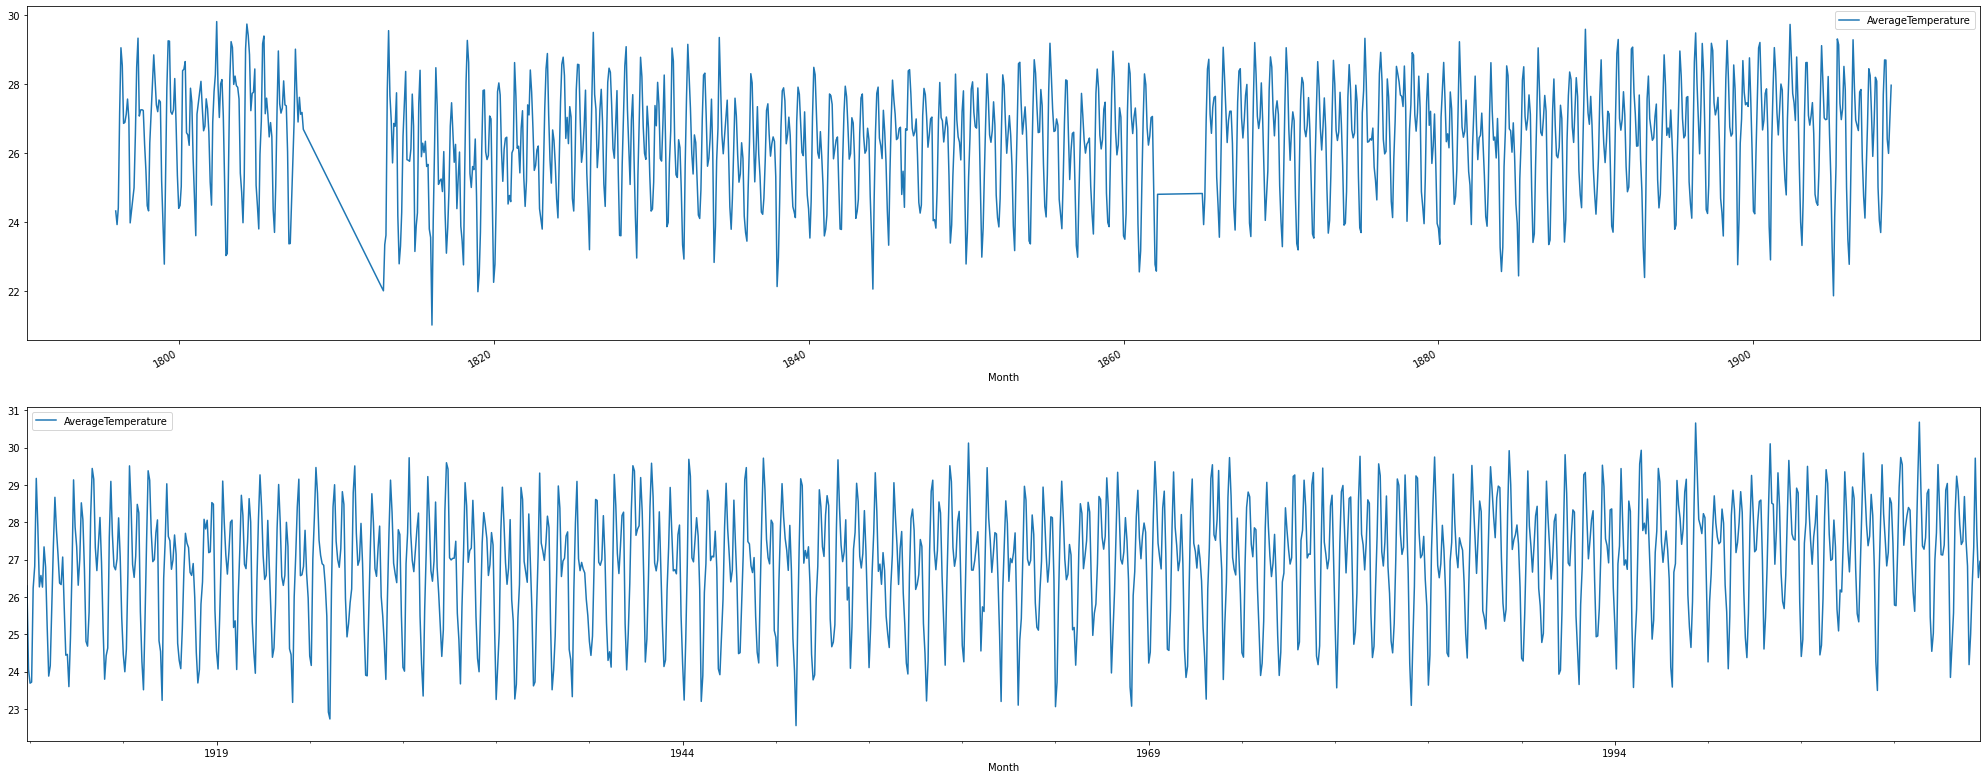

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1)

df[:1250].plot(ax=axes[0] , figsize=(35,15))
df[1250:].plot(ax=axes[1] , figsize=(35,15))

**Since there are large number of data points to plot, following code will separate them into sub plots and then display them at once**

In [ ]:
df1 = df[:500]
df2 = df[501:1000]
df3 = df[1001:1500]
df4 = df[1501:2000]
df5 = df[2001:2508]

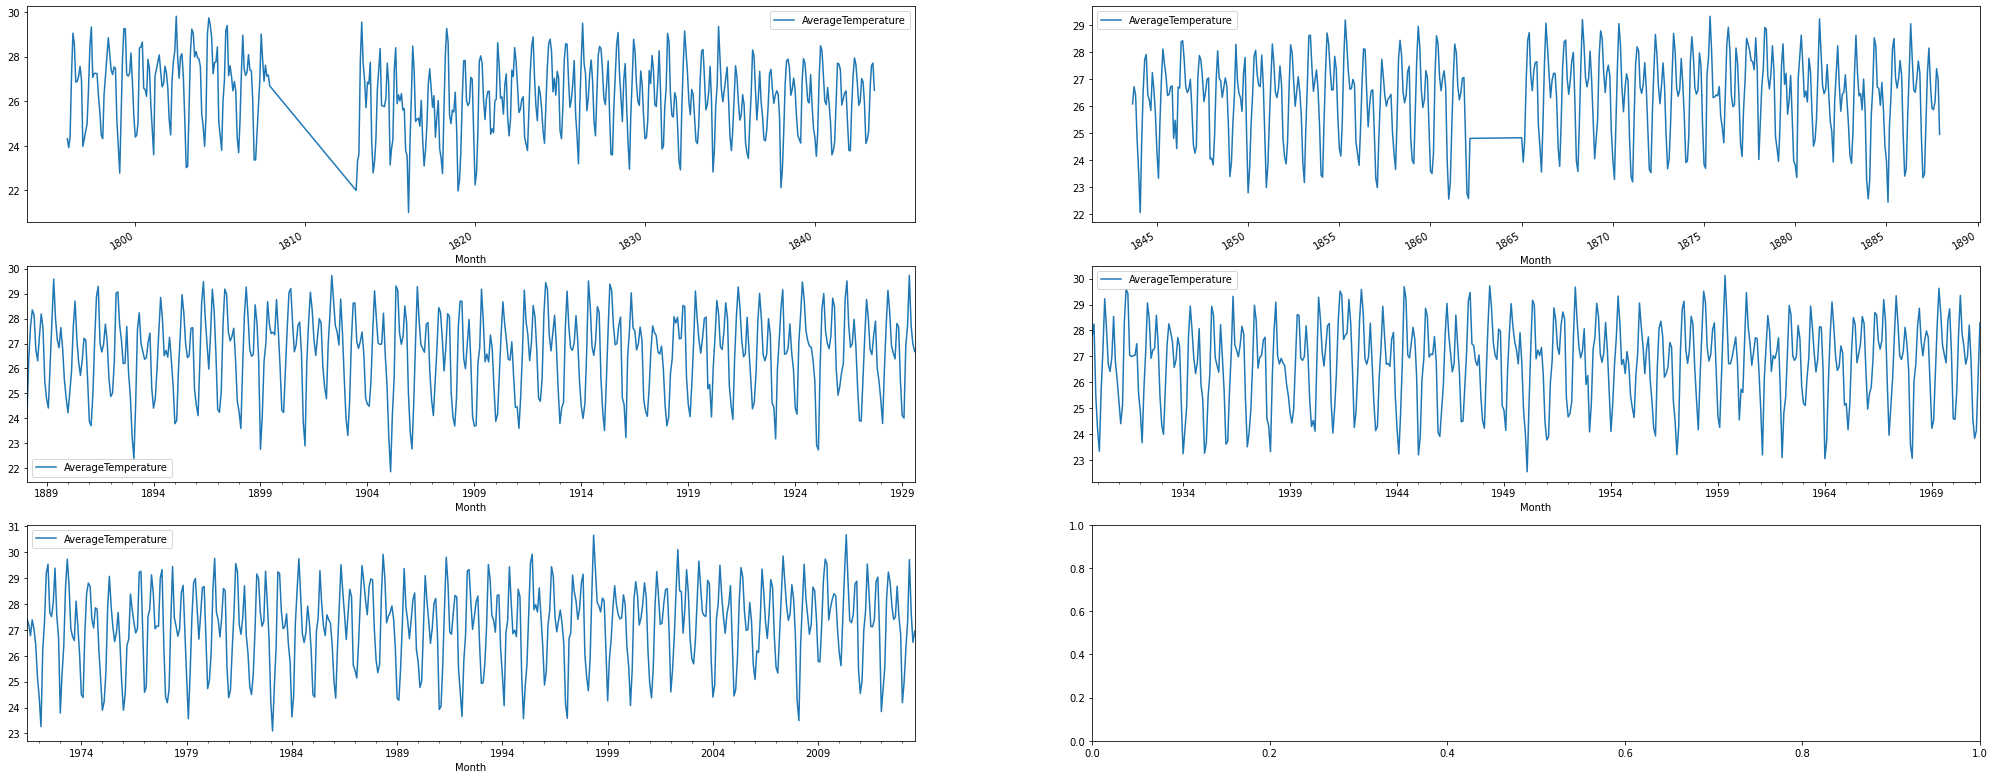

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2)
df1.plot(ax=axes[0,0] , figsize=(35,15))
df2.plot(ax=axes[0,1] ,  figsize=(35,15))
df3.plot(ax=axes[1,0] ,  figsize=(35,15))
df4.plot(ax=axes[1,1] ,  figsize=(35,15))
df5.plot(ax=axes[2,0] ,  figsize=(35,15))


##Step 05 - testing for the stationarity

In [ ]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
test_result=adfuller(df['AverageTemperature'])
test_result

(-4.24622784198672,
 0.0005497285678902373,
 27,
 2480,
 {'1%': -3.4329895489772104,
  '10%': -2.5673907792989072,
  '5%': -2.8627061345839557},
 4883.781252655038)

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(temp):
    result=adfuller(temp)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [ ]:
adfuller_test(df['AverageTemperature'])

ADF Test Statistic : -4.24622784198672
p-value : 0.0005497285678902373
#Lags Used : 27
Number of Observations Used : 2480
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


##Splitting the Data set

In [ ]:
train_df = df[:2000]
test_df = df[2000:]

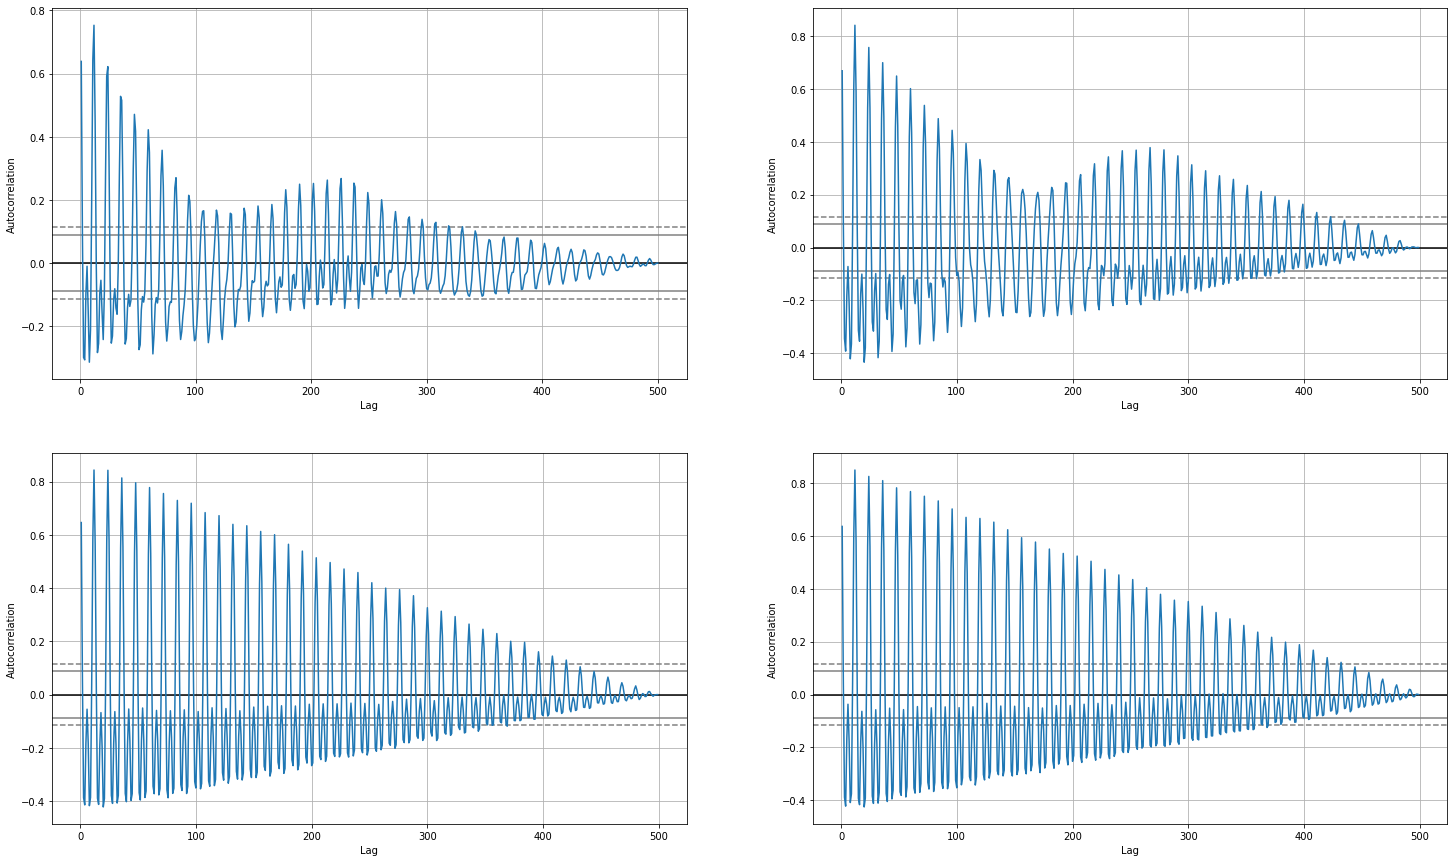

In [ ]:
from numpy.ma.core import size
from pandas.plotting import autocorrelation_plot
fig, axes = plt.subplots(nrows=2, ncols=2 , figsize=(25,15) )

autocorrelation_plot(df1['AverageTemperature'] , ax=axes[0,0] )
autocorrelation_plot(df2['AverageTemperature'] , ax=axes[0,1])
autocorrelation_plot(df3['AverageTemperature'] , ax=axes[1,0])
autocorrelation_plot(df4['AverageTemperature'] , ax=axes[1,1])

plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 

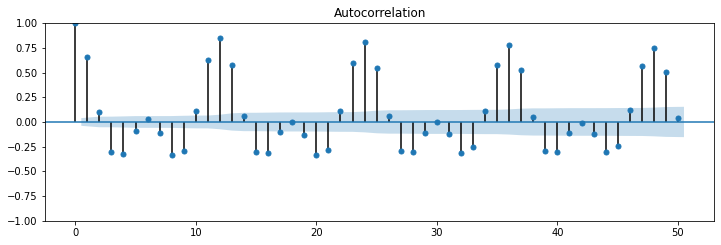

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['AverageTemperature'],lags=50,ax=ax1)


#AUTO-ARIMA

In [ ]:
#! pip install pmdarima


In [ ]:
from pmdarima.arima import auto_arima



In [ ]:
arima_model =  auto_arima(df,start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=6976.476, Time=0.16 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=6277.168, Time=1.34 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=5866.778, Time=2.50 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=6431.600, Time=0.53 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=5863.126, Time=2.90 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=6016.042, Time=1.50 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=5855.758, Time=8.23 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=5918.189, Time=3.66 sec
 ARIMA(0,1,1)(3,1,1)[12]             : AIC=inf, Time=31.64 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=inf, Time=29.87 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=23.58 sec
 ARIMA(0,1,1)(3,1,0)[12]             : AIC=5893.781, Time=7.94 sec
 ARIMA(0,1,1)(3,1,2)[12]             : AIC=inf, Time=57.60 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=6085.866, Time=4.77 sec
 ARIMA(1,1,1)(2,1,1)[12]           

In [ ]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 2508
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood               -2922.879
Date:                            Sun, 17 Apr 2022   AIC                           5855.758
Time:                                    14:28:07   BIC                           5884.868
Sample:                                         0   HQIC                          5866.328
                                           - 2508                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8019      0.008   -104.982      0.000      -0.817      -0.787
ar.S.L12       0.2896      0.029     10.028      0.000       0.233       0.346
ar.S.L24       0.1336      0.024      5.547      0.000       0.086       0.181
ma.S.L12      -0.8071      0.026    -30.642      0.000      -0.859      -0.755
sigma2         0.6081      0.010     62.452      0.000       0.589       0.627
===================================================================================
Ljung-Box (L1) (Q):                 260.79   Jarque-Bera (JB):              2419.47
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.41   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#Predictions for the next 12 months
prediction = pd.DataFrame(arima_model.predict(n_periods = 12))
prediction.columns = ['predicted_temp']
prediction

,predicted_temp
0,27.058759
1,28.260620
2,27.699173
3,26.284314
4,23.923363
5,24.519558
6,25.823648
7,27.357661
8,29.168136
9,27.802311


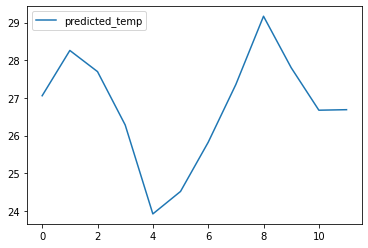

In [ ]:
prediction.plot()